In [354]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Data Pre-processing

### Read Animal Centor Intakes and Outcomes data

In [355]:
# Read intakes csv file
intakes = pd.read_csv('processed_data/dog_intakes_unified.csv', dtype={
    'AnimalID': 'string',
    'ID': 'string',
    'Breed': 'string',
    'Color': 'string',
    'Gender': 'category',
    'Name': 'string',
    'Intake-DateTime': 'string',
    'Intake-Type': 'string',
    'Intake-Condition': 'string',
    'Intake-Age(days)': 'int',
}, parse_dates=['Intake-DateTime'])
intakes.dtypes

AnimalID            string[python]
ID                  string[python]
Breed               string[python]
Color               string[python]
Gender                    category
Name                string[python]
Intake-DateTime     datetime64[ns]
Intake-Type         string[python]
Intake-Condition    string[python]
Intake-Age(days)             int32
dtype: object

In [356]:
intakes

,AnimalID,ID,Breed,Color,Gender,Name,Intake-DateTime,Intake-Type,Intake-Condition,Intake-Age(days)
0,A006100,A006100,Spinone Italiano,Yellow,Male,Scamp,2014-03-07 14:26:00,Public Assist,Normal,2190
1,A006100,A006100+,Spinone Italiano,Yellow,Male,Scamp,2014-12-19 10:21:00,Public Assist,Normal,2555
2,A006100,A006100++,Spinone Italiano,Yellow,Male,Scamp,2017-12-07 14:07:00,Stray,Normal,3650
3,A047759,A006101,Dachshund,Tricolor,Male,Oreo,2014-04-02 15:55:00,Owner Surrender,Normal,3650
4,A134067,A134067,Shetland Sheepdog,Brown,Male,Bandit,2013-11-16 09:02:00,Public Assist,Injured,12190
...,...,...,...,...,...,...,...,...,...,...
87059,A893570,A893570,Rottweiler,Black,Female,<NA>,2023-11-23 12:17:00,Stray,Normal,730
87060,A893573,A893573,Border Terrier,Brown,NaN,<NA>,2023-11-23 13:45:00,Stray,Normal,730
87061,A893578,A893578,American Staffordshire Terrier,Yellow Brindle,Male,Tiger,2023-11-23 20:19:00,Stray,Injured,240
87062,A893579,A893579,American Staffordshire Terrier,Black,Male,<NA>,2023-11-23 21:00:00,Stray,Injured,730


In [357]:
# Read outcomes csv file
outcomes = pd.read_csv('processed_data/dog_outcomes_unified.csv', dtype={
    'AnimalID': 'string',
    'ID': 'string',
    'Breed': 'string',
    'Color': 'string',
    'Gender': 'category',
    'Name': 'string',
    'Date-Of-Birth': 'string',
    'Outcome-DateTime': 'string',
    'Outcome-Type': 'string',
    'Outcome-Subtype': 'string',
    'Outcome-Age(days)': 'int'
}, parse_dates=['Date-Of-Birth', 'Outcome-DateTime'])
outcomes.dtypes

AnimalID             string[python]
ID                   string[python]
Breed                string[python]
Color                string[python]
Gender                     category
Name                 string[python]
Date-Of-Birth        datetime64[ns]
Outcome-DateTime     datetime64[ns]
Outcome-Type         string[python]
Outcome-Subtype      string[python]
Outcome-Age(days)             int32
dtype: object

In [358]:
outcomes

,AnimalID,ID,Breed,Color,Gender,Name,Date-Of-Birth,Outcome-DateTime,Outcome-Type,Outcome-Subtype,Outcome-Age(days)
0,A006100,A006100,Spinone Italiano,Yellow,Male,Scamp,2007-07-09,2014-03-08 17:10:00,Return to Owner,<NA>,2435
1,A006100,A006100+,Spinone Italiano,Yellow,Male,Scamp,2007-07-09,2014-12-20 16:35:00,Return to Owner,<NA>,2722
2,A006100,A006100++,Spinone Italiano,Yellow,Male,Scamp,2007-07-09,2017-12-07 00:00:00,Return to Owner,<NA>,3804
3,A047759,A047759,Dachshund,Tricolor,Male,Oreo,2004-04-02,2014-04-07 15:12:00,Transfer,Partner,3658
4,A134067,A134067,Shetland Sheepdog,Brown,Male,Bandit,1997-10-16,2013-11-16 11:54:00,Return to Owner,<NA>,5875
...,...,...,...,...,...,...,...,...,...,...,...
86974,A893431,A893431,Chihuahua,Tricolor,Female,Chili,2015-11-21,2023-11-21 15:41:00,Return to Owner,<NA>,2923
86975,A893432,A893432,Chihuahua,Tan,Female,Coco,2015-11-21,2023-11-21 15:41:00,Return to Owner,<NA>,2923
86976,A893452,A893452,Maltese,White,Female,Sophie,2016-11-21,2023-11-22 11:26:00,Return to Owner,<NA>,2557
86977,A893529,A893529,Labrador Retriever,White,Female,<NA>,2023-09-22,2023-11-22 16:51:00,Transfer,Partner,62


### Fill in missing values

In [359]:
# Fill in missing value in Name and Outcome-Subtype with Unknwon
intakes['Name'] = intakes['Name'].fillna('Unknown')
outcomes['Name'] = outcomes['Name'].fillna('Unknown')
outcomes['Outcome-Subtype'] = outcomes['Outcome-Subtype'].fillna('Unknown')
# Rrop rows that still have missing value
intakes = intakes.dropna().reset_index(drop=True)
outcomes = outcomes.dropna().reset_index(drop=True)

### Remove Abnormal values

In [360]:
# Remove negative age values
intakes = intakes[intakes['Intake-Age(days)'] >= 0]
outcomes = outcomes[outcomes['Outcome-Age(days)'] >= 0]

In [361]:
intakes

,AnimalID,ID,Breed,Color,Gender,Name,Intake-DateTime,Intake-Type,Intake-Condition,Intake-Age(days)
0,A006100,A006100,Spinone Italiano,Yellow,Male,Scamp,2014-03-07 14:26:00,Public Assist,Normal,2190
1,A006100,A006100+,Spinone Italiano,Yellow,Male,Scamp,2014-12-19 10:21:00,Public Assist,Normal,2555
2,A006100,A006100++,Spinone Italiano,Yellow,Male,Scamp,2017-12-07 14:07:00,Stray,Normal,3650
3,A047759,A006101,Dachshund,Tricolor,Male,Oreo,2014-04-02 15:55:00,Owner Surrender,Normal,3650
4,A134067,A134067,Shetland Sheepdog,Brown,Male,Bandit,2013-11-16 09:02:00,Public Assist,Injured,12190
...,...,...,...,...,...,...,...,...,...,...
86402,A893565,A893565,Chihuahua,Buff,Female,Unknown,2023-11-23 08:31:00,Stray,Injured,365
86403,A893570,A893570,Rottweiler,Black,Female,Unknown,2023-11-23 12:17:00,Stray,Normal,730
86404,A893578,A893578,American Staffordshire Terrier,Yellow Brindle,Male,Tiger,2023-11-23 20:19:00,Stray,Injured,240
86405,A893579,A893579,American Staffordshire Terrier,Black,Male,Unknown,2023-11-23 21:00:00,Stray,Injured,730


In [362]:
outcomes

,AnimalID,ID,Breed,Color,Gender,Name,Date-Of-Birth,Outcome-DateTime,Outcome-Type,Outcome-Subtype,Outcome-Age(days)
0,A006100,A006100,Spinone Italiano,Yellow,Male,Scamp,2007-07-09,2014-03-08 17:10:00,Return to Owner,Unknown,2435
1,A006100,A006100+,Spinone Italiano,Yellow,Male,Scamp,2007-07-09,2014-12-20 16:35:00,Return to Owner,Unknown,2722
2,A006100,A006100++,Spinone Italiano,Yellow,Male,Scamp,2007-07-09,2017-12-07 00:00:00,Return to Owner,Unknown,3804
3,A047759,A047759,Dachshund,Tricolor,Male,Oreo,2004-04-02,2014-04-07 15:12:00,Transfer,Partner,3658
4,A134067,A134067,Shetland Sheepdog,Brown,Male,Bandit,1997-10-16,2013-11-16 11:54:00,Return to Owner,Unknown,5875
...,...,...,...,...,...,...,...,...,...,...,...
86301,A893431,A893431,Chihuahua,Tricolor,Female,Chili,2015-11-21,2023-11-21 15:41:00,Return to Owner,Unknown,2923
86302,A893432,A893432,Chihuahua,Tan,Female,Coco,2015-11-21,2023-11-21 15:41:00,Return to Owner,Unknown,2923
86303,A893452,A893452,Maltese,White,Female,Sophie,2016-11-21,2023-11-22 11:26:00,Return to Owner,Unknown,2557
86304,A893529,A893529,Labrador Retriever,White,Female,Unknown,2023-09-22,2023-11-22 16:51:00,Transfer,Partner,62


### Add a new column of age category according to the outcomes age

In [363]:
conditions = [
    (outcomes['Outcome-Age(days)'] <= 180),
    (outcomes['Outcome-Age(days)'] > 180) & (outcomes['Outcome-Age(days)'] <= 730),
    (outcomes['Outcome-Age(days)'] > 730) & (outcomes['Outcome-Age(days)'] <= 2555),
    (outcomes['Outcome-Age(days)'] > 2555)
]
values = ['Baby', 'Young', 'Adult', 'Senior']

outcomes['Age'] = np.select(conditions, values)

### Add a new boolean column 'IsAdopted' according to 'Outcome-type'

In [364]:
# Define adopted as adoption outcome-type
adopted = ['Adoption']
outcomes['IsAdopted'] = np.where(outcomes['Outcome-Type'].isin(adopted), True, False)

In [365]:
outcomes

,AnimalID,ID,Breed,Color,Gender,Name,Date-Of-Birth,Outcome-DateTime,Outcome-Type,Outcome-Subtype,Outcome-Age(days),Age,IsAdopted
0,A006100,A006100,Spinone Italiano,Yellow,Male,Scamp,2007-07-09,2014-03-08 17:10:00,Return to Owner,Unknown,2435,Adult,False
1,A006100,A006100+,Spinone Italiano,Yellow,Male,Scamp,2007-07-09,2014-12-20 16:35:00,Return to Owner,Unknown,2722,Senior,False
2,A006100,A006100++,Spinone Italiano,Yellow,Male,Scamp,2007-07-09,2017-12-07 00:00:00,Return to Owner,Unknown,3804,Senior,False
3,A047759,A047759,Dachshund,Tricolor,Male,Oreo,2004-04-02,2014-04-07 15:12:00,Transfer,Partner,3658,Senior,False
4,A134067,A134067,Shetland Sheepdog,Brown,Male,Bandit,1997-10-16,2013-11-16 11:54:00,Return to Owner,Unknown,5875,Senior,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86301,A893431,A893431,Chihuahua,Tricolor,Female,Chili,2015-11-21,2023-11-21 15:41:00,Return to Owner,Unknown,2923,Senior,False
86302,A893432,A893432,Chihuahua,Tan,Female,Coco,2015-11-21,2023-11-21 15:41:00,Return to Owner,Unknown,2923,Senior,False
86303,A893452,A893452,Maltese,White,Female,Sophie,2016-11-21,2023-11-22 11:26:00,Return to Owner,Unknown,2557,Senior,False
86304,A893529,A893529,Labrador Retriever,White,Female,Unknown,2023-09-22,2023-11-22 16:51:00,Transfer,Partner,62,Baby,False


### Merge intakes and outcomes dataframes by ID

In [366]:
intakes_outcomes = pd.merge(intakes, outcomes, how="inner", on=["AnimalID", "ID", "Breed", "Color", "Gender", "Name"], validate="1:1")
intakes_outcomes['Outcome-Age(days)'] = intakes_outcomes['Outcome-Age(days)'].astype('Int64')
intakes_outcomes

,AnimalID,ID,Breed,Color,Gender,Name,Intake-DateTime,Intake-Type,Intake-Condition,Intake-Age(days),Date-Of-Birth,Outcome-DateTime,Outcome-Type,Outcome-Subtype,Outcome-Age(days),Age,IsAdopted
0,A006100,A006100,Spinone Italiano,Yellow,Male,Scamp,2014-03-07 14:26:00,Public Assist,Normal,2190,2007-07-09,2014-03-08 17:10:00,Return to Owner,Unknown,2435,Adult,False
1,A006100,A006100+,Spinone Italiano,Yellow,Male,Scamp,2014-12-19 10:21:00,Public Assist,Normal,2555,2007-07-09,2014-12-20 16:35:00,Return to Owner,Unknown,2722,Senior,False
2,A006100,A006100++,Spinone Italiano,Yellow,Male,Scamp,2017-12-07 14:07:00,Stray,Normal,3650,2007-07-09,2017-12-07 00:00:00,Return to Owner,Unknown,3804,Senior,False
3,A134067,A134067,Shetland Sheepdog,Brown,Male,Bandit,2013-11-16 09:02:00,Public Assist,Injured,12190,1997-10-16,2013-11-16 11:54:00,Return to Owner,Unknown,5875,Senior,False
4,A141142,A141142,Labrador Retriever,Black,Female,Bettie,2013-11-16 14:46:00,Stray,Aged,11825,1998-06-01,2013-11-17 11:40:00,Return to Owner,Unknown,5648,Senior,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85791,A893431,A893431,Chihuahua,Tricolor,Female,Chili,2023-11-21 11:21:00,Public Assist,Normal,2920,2015-11-21,2023-11-21 15:41:00,Return to Owner,Unknown,2923,Senior,False
85792,A893432,A893432,Chihuahua,Tan,Female,Coco,2023-11-21 11:21:00,Public Assist,Normal,2920,2015-11-21,2023-11-21 15:41:00,Return to Owner,Unknown,2923,Senior,False
85793,A893452,A893452,Maltese,White,Female,Sophie,2023-11-21 13:38:00,Public Assist,Normal,2555,2016-11-21,2023-11-22 11:26:00,Return to Owner,Unknown,2557,Senior,False
85794,A893529,A893529,Labrador Retriever,White,Female,Unknown,2023-11-22 14:26:00,Owner Surrender,Normal,30,2023-09-22,2023-11-22 16:51:00,Transfer,Partner,62,Baby,False


### Read dog breed data

In [367]:
breeds = pd.read_csv('processed_data/breed_data.csv', dtype={
    'Breed': 'string',
    'Category': 'category',
    'Intelligence-Ranking': 'Float64',
    'Intelligence-Category': 'category',
    'Size-Category': 'category',
    'Longevity': 'Float64',
    'Total-Cost($)': 'Float64',
    'Purchase-Cost($)': 'Float64',
    'Food-Cost($)': 'Float64'
})
breeds.dtypes

Breed                    string[python]
Category                       category
Intelligence-Ranking            Float64
Intelligence-Category          category
Size-Category                  category
Longevity                       Float64
Total-Cost($)                   Float64
Purchase-Cost($)                Float64
Food-Cost($)                    Float64
dtype: object

In [368]:
breeds

,Breed,Category,Intelligence-Ranking,Intelligence-Category,Size-Category,Longevity,Total-Cost($),Purchase-Cost($),Food-Cost($)
0,Affenpinscher,Toy,37.00,Above-Average,Small,11.42,15835.00,510.00,3180.00
1,Afghan Hound,Hound,80.00,Lowest,Large,11.92,20818.00,890.00,7260.00
2,Airedale Terrier,Terrier,29.00,Above-Average,Medium,11.45,<NA>,733.00,<NA>
3,Akita,Working,54.00,Average,Large,10.16,18217.00,1202.00,6188.00
4,Alaskan Malamute,Working,50.00,Average,Large,10.67,19069.00,1210.00,6499.00
...,...,...,...,...,...,...,...,...,...
167,Whippet,Hound,51.00,Average,Medium,12.87,18160.00,915.00,3584.00
168,Wire Fox Terrier,Terrier,51.00,Average,Small,13.17,<NA>,668.00,<NA>
169,Wirehaired Pointing Griffon,Sporting,46.00,Average,Medium,8.80,<NA>,755.00,<NA>
170,Xoloitzcuintli,Non-Sporting,<NA>,NaN,Medium,<NA>,<NA>,717.00,<NA>


### Fill in missing values

In [369]:
# Fill in missing values in Intelligence-Ranking and Longevity with the average value of the same category
breeds["Intelligence-Ranking"].fillna(
    breeds.groupby("Category")["Intelligence-Ranking"].transform("mean"),inplace=True
)
breeds["Intelligence-Ranking"].fillna(
    breeds["Intelligence-Ranking"].mean(),inplace=True
)

breeds["Longevity"].fillna(
    breeds.groupby("Category")["Longevity"].transform("mean"),inplace=True
)
breeds["Longevity"].fillna(
    breeds["Longevity"].mean(),inplace=True
)

In [370]:
# Fill in numeric missing values in Cost with average value of the same category & size combination
breeds["Total-Cost($)"].fillna(
    breeds.groupby(["Category", "Size-Category"])["Total-Cost($)"].transform("mean"),inplace=True
)
breeds["Total-Cost($)"].fillna(
    breeds["Total-Cost($)"].mean(),inplace=True
)

breeds["Food-Cost($)"].fillna(
    breeds.groupby(["Category", "Size-Category"])["Food-Cost($)"].transform("mean"),inplace=True
)
breeds["Food-Cost($)"].fillna(
    breeds["Food-Cost($)"].mean(),inplace=True
)

breeds["Purchase-Cost($)"].fillna(
    breeds.groupby(["Category", "Longevity", "Size-Category"])["Purchase-Cost($)"].transform("mean"),inplace=True
)
breeds["Purchase-Cost($)"].fillna(
    breeds["Purchase-Cost($)"].mean(),inplace=True
)

breeds

,Breed,Category,Intelligence-Ranking,Intelligence-Category,Size-Category,Longevity,Total-Cost($),Purchase-Cost($),Food-Cost($)
0,Affenpinscher,Toy,37.00,Above-Average,Small,11.42,15835.00,510.00,3180.00
1,Afghan Hound,Hound,80.00,Lowest,Large,11.92,20818.00,890.00,7260.00
2,Airedale Terrier,Terrier,29.00,Above-Average,Medium,11.45,16605.67,733.00,4224.00
3,Akita,Working,54.00,Average,Large,10.16,18217.00,1202.00,6188.00
4,Alaskan Malamute,Working,50.00,Average,Large,10.67,19069.00,1210.00,6499.00
...,...,...,...,...,...,...,...,...,...
167,Whippet,Hound,51.00,Average,Medium,12.87,18160.00,915.00,3584.00
168,Wire Fox Terrier,Terrier,51.00,Average,Small,13.17,18078.44,668.00,3809.00
169,Wirehaired Pointing Griffon,Sporting,46.00,Average,Medium,8.80,16668.89,755.00,4219.45
170,Xoloitzcuintli,Non-Sporting,46.71,NaN,Medium,10.98,15294.33,717.00,3790.29


In [371]:
# Cast object numbers to float
pd.options.display.float_format = "{:.2f}".format
breeds["Longevity"] = breeds["Longevity"].astype('float')
# Cast object numbers to int
breeds["Intelligence-Ranking"] = breeds["Intelligence-Ranking"].astype('int')
breeds["Total-Cost($)"] = breeds["Total-Cost($)"].astype('int')
breeds["Purchase-Cost($)"] = breeds["Purchase-Cost($)"].astype('int')
breeds["Food-Cost($)"] = breeds["Food-Cost($)"].astype('int')
breeds.dtypes

Breed                    string[python]
Category                       category
Intelligence-Ranking              int32
Intelligence-Category          category
Size-Category                  category
Longevity                       float64
Total-Cost($)                     int32
Purchase-Cost($)                  int32
Food-Cost($)                      int32
dtype: object

In [372]:
# Fill in missing values in Intelligence-Category according to Intelligence-Ranking
intel_conditions = [
    (breeds['Intelligence-Ranking'] <= 10),
    (breeds['Intelligence-Ranking'] > 10) & (breeds['Intelligence-Ranking'] <= 26),
    (breeds['Intelligence-Ranking'] > 26) & (breeds['Intelligence-Ranking'] <= 39),
    (breeds['Intelligence-Ranking'] > 39) & (breeds['Intelligence-Ranking'] <= 54),
    (breeds['Intelligence-Ranking'] > 54) & (breeds['Intelligence-Ranking'] <= 69),
    (breeds['Intelligence-Ranking'] > 69)
]
intel_values = ['Brightest', 'Excellent', 'Above-Average', 'Average', 'Fair', 'Low']
breeds['Intelligence-Category'] = np.select(intel_conditions, intel_values)

breeds

,Breed,Category,Intelligence-Ranking,Intelligence-Category,Size-Category,Longevity,Total-Cost($),Purchase-Cost($),Food-Cost($)
0,Affenpinscher,Toy,37,Above-Average,Small,11.42,15835,510,3180
1,Afghan Hound,Hound,80,Low,Large,11.92,20818,890,7260
2,Airedale Terrier,Terrier,29,Above-Average,Medium,11.45,16605,733,4224
3,Akita,Working,54,Average,Large,10.16,18217,1202,6188
4,Alaskan Malamute,Working,50,Average,Large,10.67,19069,1210,6499
...,...,...,...,...,...,...,...,...,...
167,Whippet,Hound,51,Average,Medium,12.87,18160,915,3584
168,Wire Fox Terrier,Terrier,51,Average,Small,13.17,18078,668,3809
169,Wirehaired Pointing Griffon,Sporting,46,Average,Medium,8.80,16668,755,4219
170,Xoloitzcuintli,Non-Sporting,46,Average,Medium,10.98,15294,717,3790


### Use Agglomerative Clustering to add a new column 'Cost-Category' based on Total-Cost, Purchase-Cost, Food-Cost

In [373]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [374]:
cost_df = breeds[['Total-Cost($)', 'Purchase-Cost($)', 'Food-Cost($)']]
cost_df

,Total-Cost($),Purchase-Cost($),Food-Cost($)
0,15835,510,3180
1,20818,890,7260
2,16605,733,4224
3,18217,1202,6188
4,19069,1210,6499
...,...,...,...
167,18160,915,3584
168,18078,668,3809
169,16668,755,4219
170,15294,717,3790


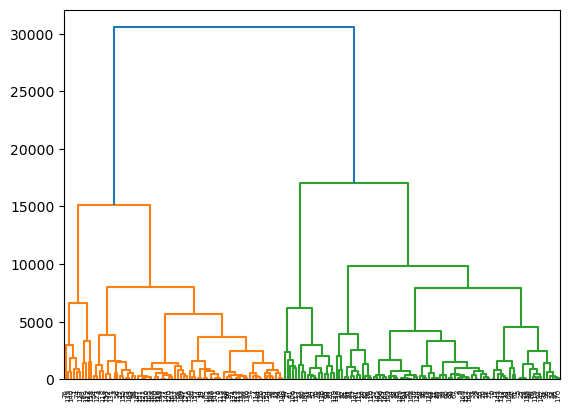

In [375]:
dend_ward = shc.dendrogram(shc.linkage(cost_df, method='ward'))

In [376]:
# Clustering - ward linkage
# Choose number of clusters as 4 according to dendrogram
clustering_ward = AgglomerativeClustering(linkage='ward', n_clusters=4)
clustering_ward.fit(cost_df)
breeds['Cost-Category'] = clustering_ward.labels_

current_labels = [0, 1, 2, 3]
desired_labels = ['Saver', 'Budget', 'Mid-Price', 'High-End']
map_dict = dict(zip(current_labels, desired_labels))
breeds['Cost-Category'] = breeds['Cost-Category'].map(map_dict)

breeds

,Breed,Category,Intelligence-Ranking,Intelligence-Category,Size-Category,Longevity,Total-Cost($),Purchase-Cost($),Food-Cost($),Cost-Category
0,Affenpinscher,Toy,37,Above-Average,Small,11.42,15835,510,3180,Saver
1,Afghan Hound,Hound,80,Low,Large,11.92,20818,890,7260,High-End
2,Airedale Terrier,Terrier,29,Above-Average,Medium,11.45,16605,733,4224,Saver
3,Akita,Working,54,Average,Large,10.16,18217,1202,6188,Budget
4,Alaskan Malamute,Working,50,Average,Large,10.67,19069,1210,6499,Budget
...,...,...,...,...,...,...,...,...,...,...
167,Whippet,Hound,51,Average,Medium,12.87,18160,915,3584,Budget
168,Wire Fox Terrier,Terrier,51,Average,Small,13.17,18078,668,3809,Budget
169,Wirehaired Pointing Griffon,Sporting,46,Average,Medium,8.80,16668,755,4219,Saver
170,Xoloitzcuintli,Non-Sporting,46,Average,Medium,10.98,15294,717,3790,Saver


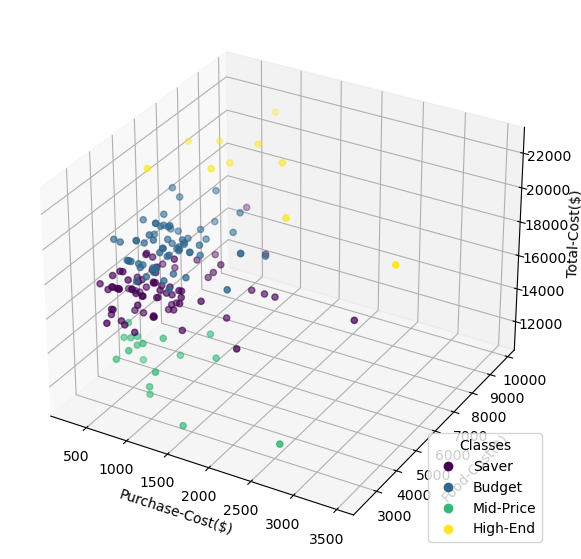

In [377]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
scatter = ax.scatter3D(cost_df['Purchase-Cost($)'], cost_df['Food-Cost($)'], cost_df['Total-Cost($)'], c = clustering_ward.labels_)
ax.set(xlabel='Purchase-Cost($)', ylabel='Food-Cost($)', zlabel='Total-Cost($)')
_ = ax.legend(
    scatter.legend_elements()[0], desired_labels, loc="lower right", title="Classes"
)
plt.show()

### Join breed data to intakes & outcomes data

In [378]:
data = pd.merge(intakes_outcomes, breeds, how="left", on=["Breed"])
data

,AnimalID,ID,Breed,Color,Gender,Name,Intake-DateTime,Intake-Type,Intake-Condition,Intake-Age(days),...,IsAdopted,Category,Intelligence-Ranking,Intelligence-Category,Size-Category,Longevity,Total-Cost($),Purchase-Cost($),Food-Cost($),Cost-Category
0,A006100,A006100,Spinone Italiano,Yellow,Male,Scamp,2014-03-07 14:26:00,Public Assist,Normal,2190,...,False,Sporting,27,Above-Average,Large,9.00,18062,1725,5679,Budget
1,A006100,A006100+,Spinone Italiano,Yellow,Male,Scamp,2014-12-19 10:21:00,Public Assist,Normal,2555,...,False,Sporting,27,Above-Average,Large,9.00,18062,1725,5679,Budget
2,A006100,A006100++,Spinone Italiano,Yellow,Male,Scamp,2017-12-07 14:07:00,Stray,Normal,3650,...,False,Sporting,27,Above-Average,Large,9.00,18062,1725,5679,Budget
3,A134067,A134067,Shetland Sheepdog,Brown,Male,Bandit,2013-11-16 09:02:00,Public Assist,Injured,12190,...,False,Herding,6,Brightest,Small,12.53,17469,465,3698,Saver
4,A141142,A141142,Labrador Retriever,Black,Female,Bettie,2013-11-16 14:46:00,Stray,Aged,11825,...,False,Sporting,7,Brightest,Medium,12.04,18422,810,4819,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85791,A893431,A893431,Chihuahua,Tricolor,Female,Chili,2023-11-21 11:21:00,Public Assist,Normal,2920,...,False,Toy,67,Fair,Small,16.50,22640,588,4594,High-End
85792,A893432,A893432,Chihuahua,Tan,Female,Coco,2023-11-21 11:21:00,Public Assist,Normal,2920,...,False,Toy,67,Fair,Small,16.50,22640,588,4594,High-End
85793,A893452,A893452,Maltese,White,Female,Sophie,2023-11-21 13:38:00,Public Assist,Normal,2555,...,False,Toy,59,Fair,Small,12.25,16073,650,2410,Saver
85794,A893529,A893529,Labrador Retriever,White,Female,Unknown,2023-11-22 14:26:00,Owner Surrender,Normal,30,...,False,Sporting,7,Brightest,Medium,12.04,18422,810,4819,Budget


### Read active dogs data from petfinder

In [379]:
petfinder = pd.read_csv('processed_data/petfinder_unified.csv', dtype={
    'Petfinder-ID': 'string',
    'Name': 'string',
    'Size': 'category',
    'Gender': 'category',
    'Age': 'category',
    'Color': 'string',
    'Breed': 'string'
})
petfinder.dtypes

Petfinder-ID    string[python]
Name            string[python]
Size                  category
Gender                category
Age                   category
Color           string[python]
Breed           string[python]
dtype: object

In [380]:
# Drop rows that have a missing value
petfinder = petfinder.dropna().reset_index(drop=True)

In [381]:
petfinder

,Petfinder-ID,Name,Size,Gender,Age,Color,Breed
0,65653819,Eloise,Large,Female,Adult,Gray,Bull Terrier
1,68926034,Penny,Medium,Female,Baby,Black,Labrador Retriever
2,69313950,Pirate,Extra Large,Male,Baby,Tricolor,Saint Bernard
3,69340682,Fiona,Small,Female,Senior,Apricot,Chihuahua
4,69402276,Rory,Medium,Female,Adult,Red,Pembroke Welsh Corgi
...,...,...,...,...,...,...,...
7334,69816070,Bubba and Cadence,Small,Male,Senior,Tricolor,Border Terrier
7335,69816083,Bubba,Large,Male,Young,Black,Parson Russell Terrier
7336,69816084,NORA - 3 mo. old gentle quiet smart curious baby,Large,Female,Baby,Yellow,Labrador Retriever
7337,69816100,Blaze,Medium,Male,Baby,Black,American Staffordshire Terrier


### Join breed data to petfinder dog data

In [382]:
petfinder = pd.merge(petfinder, breeds, how="left", on=["Breed"])
petfinder

,Petfinder-ID,Name,Size,Gender,Age,Color,Breed,Category,Intelligence-Ranking,Intelligence-Category,Size-Category,Longevity,Total-Cost($),Purchase-Cost($),Food-Cost($),Cost-Category
0,65653819,Eloise,Large,Female,Adult,Gray,Bull Terrier,Terrier,66,Fair,Medium,10.21,16051,1085,4087,Saver
1,68926034,Penny,Medium,Female,Baby,Black,Labrador Retriever,Sporting,7,Brightest,Medium,12.04,18422,810,4819,Budget
2,69313950,Pirate,Extra Large,Male,Baby,Tricolor,Saint Bernard,Working,65,Fair,Large,7.78,17336,875,8124,Saver
3,69340682,Fiona,Small,Female,Senior,Apricot,Chihuahua,Toy,67,Fair,Small,16.50,22640,588,4594,High-End
4,69402276,Rory,Medium,Female,Adult,Red,Pembroke Welsh Corgi,Herding,11,Excellent,Small,12.25,19625,587,6026,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7334,69816070,Bubba and Cadence,Small,Male,Senior,Tricolor,Border Terrier,Terrier,30,Above-Average,Small,14.00,19575,833,3898,Budget
7335,69816083,Bubba,Large,Male,Young,Black,Parson Russell Terrier,Terrier,44,Average,Small,11.48,18078,528,3809,Budget
7336,69816084,NORA - 3 mo. old gentle quiet smart curious baby,Large,Female,Baby,Yellow,Labrador Retriever,Sporting,7,Brightest,Medium,12.04,18422,810,4819,Budget
7337,69816100,Blaze,Medium,Male,Baby,Black,American Staffordshire Terrier,Terrier,34,Above-Average,Medium,11.48,16605,1043,4224,Saver


### Write the processed data to csv file

In [383]:
data.to_csv('data.csv', index=False)
petfinder.to_csv('petfinder.csv', index=False)

In [384]:
features = data[['Breed', 'Color', 'Gender', 'Age', 'Intake-Type', 'Category', 'Intelligence-Category', 'Size-Category', 'Cost-Category', 'IsAdopted']]
features.to_csv('features.csv', index=False, header=False)